**Etapa 1: Análise Exploratória e Descritiva**

In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ignorar avisos futuros para manter a saída limpa
warnings.filterwarnings('ignore')

# Configurar o estilo dos gráficos do seaborn
sns.set_theme(style="whitegrid")

# Carregar o dataset da atividade
try:
    df = pd.read_csv('produtos_agricolas.csv')
    print("Dataset carregado com sucesso!")
except FileNotFoundError:
    print("Erro: O arquivo 'produtos_agricolas.csv' não foi encontrado.")
    print("Por favor, verifique se o arquivo está no mesmo diretório ou forneça o caminho correto.")

# Exibir as 5 primeiras linhas para verificar o carregamento
if 'df' in locals():
    print(df.head())

Dataset carregado com sucesso!
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [2]:
if 'df' in locals():
    # 1. Informações gerais (tipos de dados, contagem de nulos)
    print("\n--- Informações Gerais (df.info()) ---")
    df.info()

    # 2. Estatísticas descritivas para colunas numéricas
    print("\n--- Estatísticas Descritivas (df.describe()) ---")
    print(df.describe())

    # 3. Verificação de dados duplicados
    # No PDF de aula, essa verificação é feita [cite: 704]
    duplicados = df.duplicated().sum()
    print(f"\n--- Verificação de Duplicados ---")
    print(f"Número de linhas duplicadas encontradas: {duplicados}")

    # Se houver duplicados, podemos removê-los (opcional, mas recomendado)
    if duplicados > 0:
        df.drop_duplicates(inplace=True)
        print(f"Linhas duplicadas foram removidas. Novo shape: {df.shape}")


--- Informações Gerais (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB

--- Estatísticas Descritivas (df.describe()) ---
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5

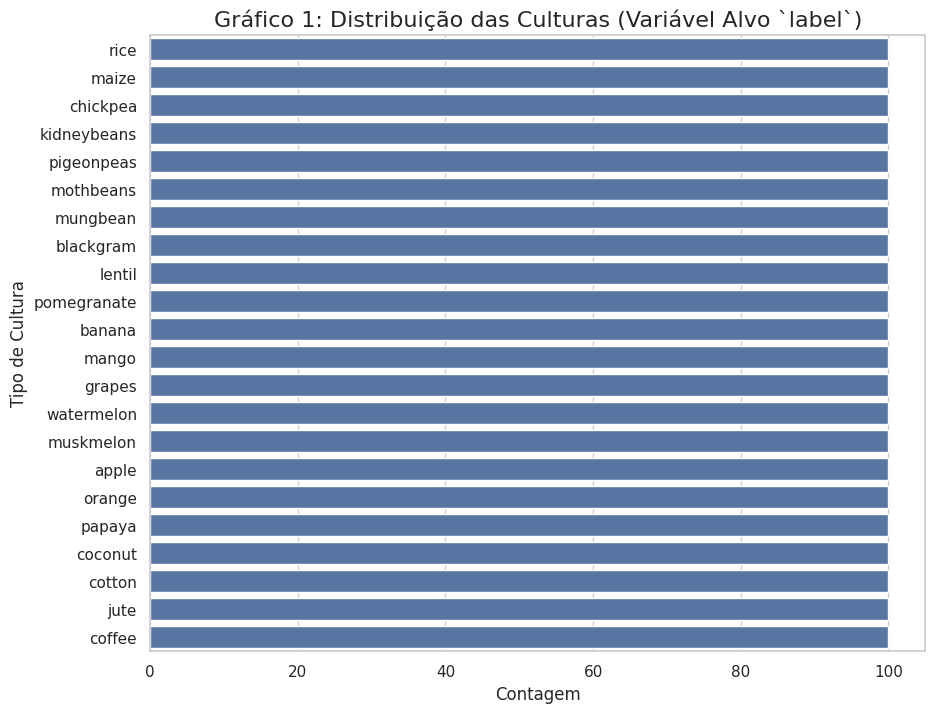

In [3]:
if 'df' in locals():
    plt.figure(figsize=(10, 8))
    sns.countplot(y='label', data=df, order=df['label'].value_counts().index)
    plt.title('Gráfico 1: Distribuição das Culturas (Variável Alvo `label`)', fontsize=16)
    plt.xlabel('Contagem', fontsize=12)
    plt.ylabel('Tipo de Cultura', fontsize=12)
    plt.show()


--- Gráfico 2: Distribuição das Variáveis Numéricas ---


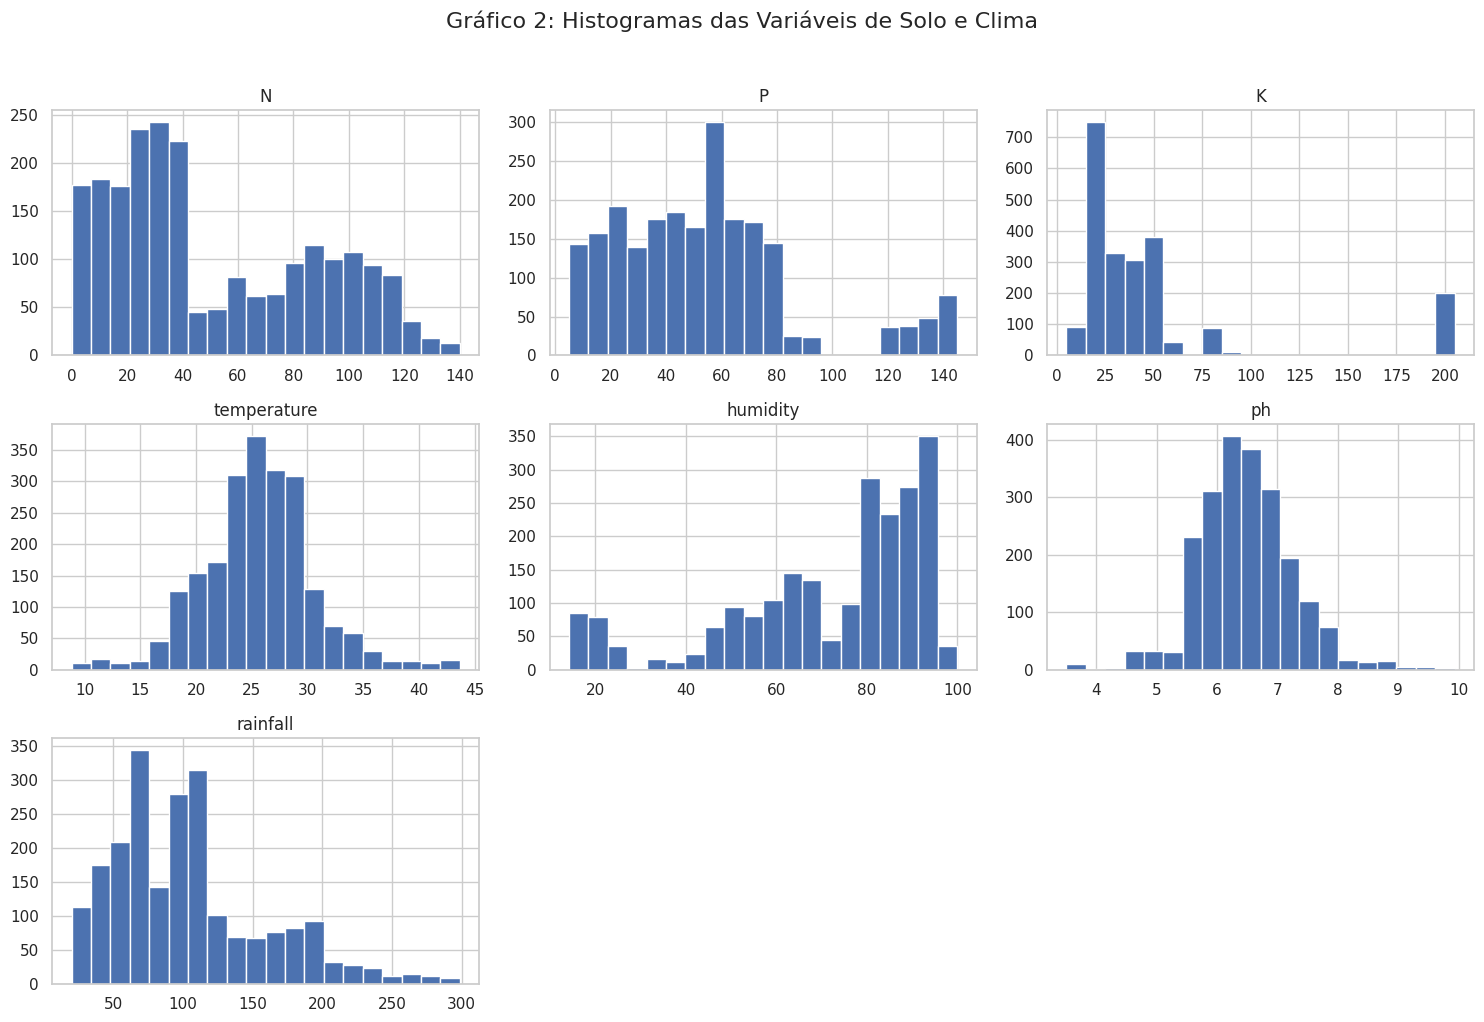

In [4]:
if 'df' in locals():
    features_numericas = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

    print("\n--- Gráfico 2: Distribuição das Variáveis Numéricas ---")
    df[features_numericas].hist(bins=20, figsize=(15, 10), layout=(3, 3))
    plt.suptitle('Gráfico 2: Histogramas das Variáveis de Solo e Clima', y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()


--- Gráfico 3: Análise de Outliers ---


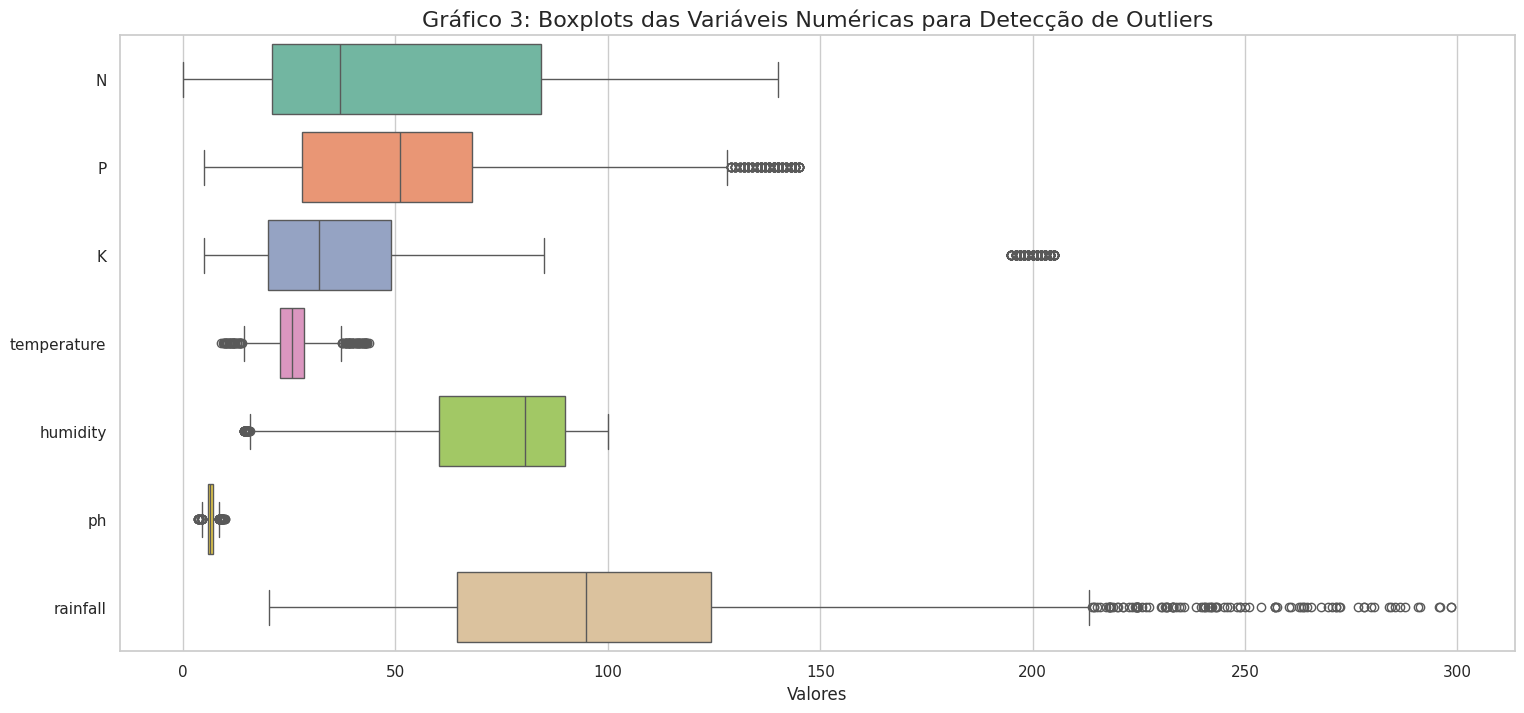

In [5]:
if 'df' in locals():
    print("\n--- Gráfico 3: Análise de Outliers ---")
    plt.figure(figsize=(18, 8))

    # Usamos o data=df[features_numericas] para plotar todos de uma vez
    sns.boxplot(data=df[features_numericas], orient='h', palette='Set2')
    plt.title('Gráfico 3: Boxplots das Variáveis Numéricas para Detecção de Outliers', fontsize=16)
    plt.xlabel('Valores', fontsize=12)
    plt.show()


--- Gráfico 4: Matriz de Correlação ---


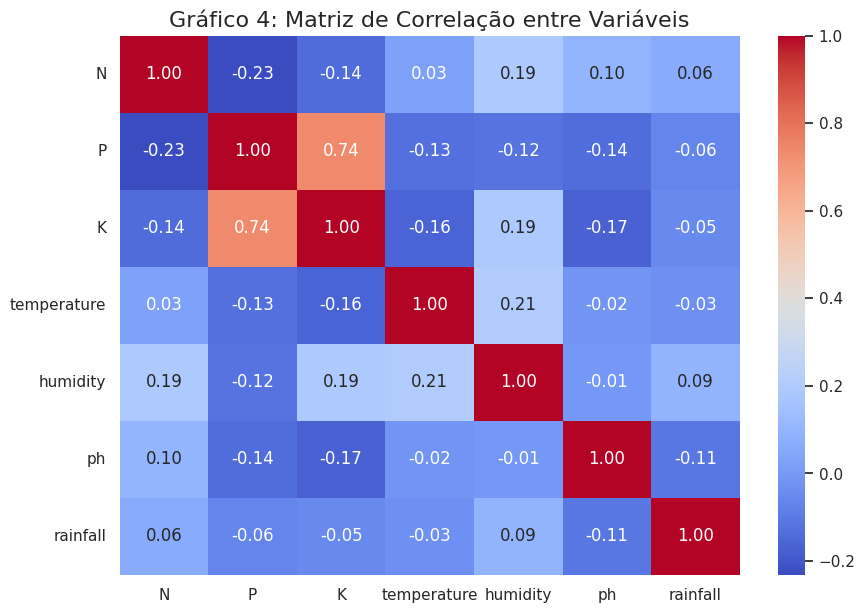

In [6]:
if 'df' in locals():
    print("\n--- Gráfico 4: Matriz de Correlação ---")
    plt.figure(figsize=(10, 7))

    # Calcula a correlação
    corr_matrix = df[features_numericas].corr()

    # Gera o heatmap
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Gráfico 4: Matriz de Correlação entre Variáveis', fontsize=16)
    plt.show()


--- Gráfico 5: Perfil de Nutrientes (N, P, K) por Cultura ---


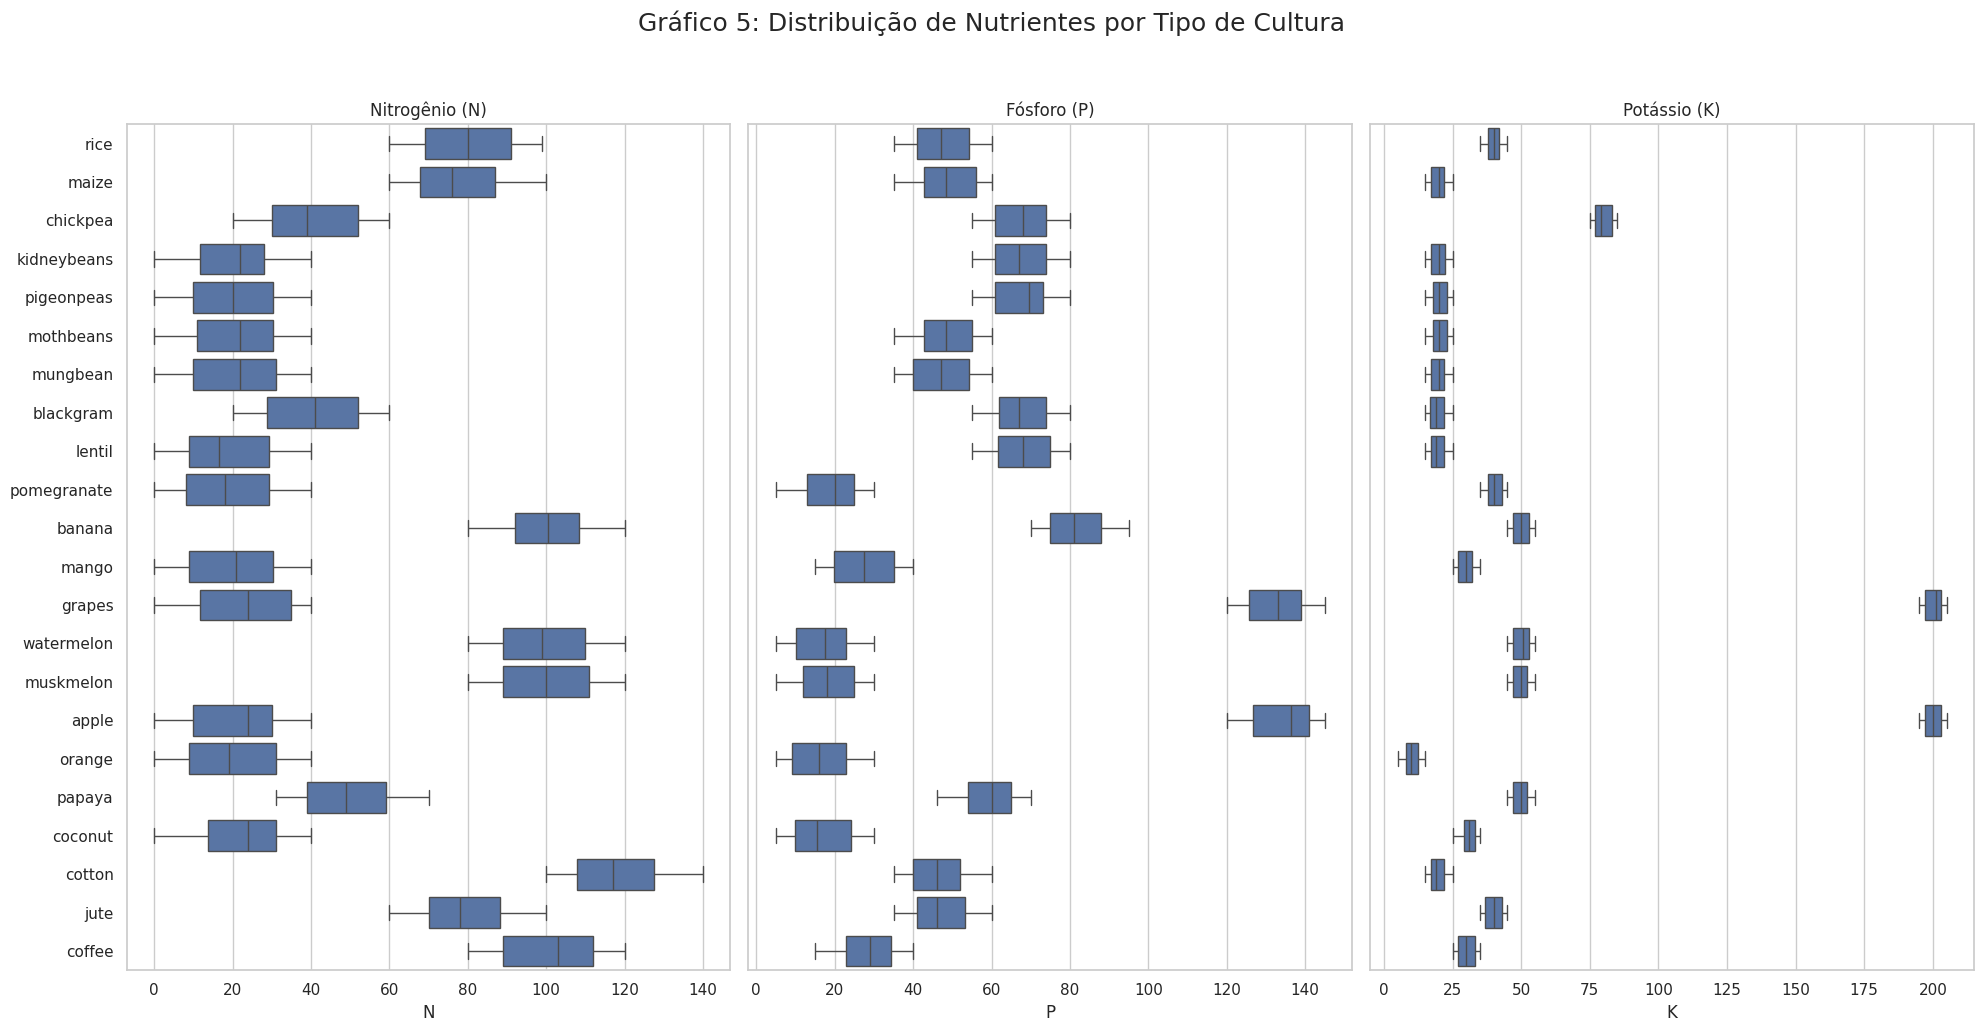

In [7]:
if 'df' in locals():
    print("\n--- Gráfico 5: Perfil de Nutrientes (N, P, K) por Cultura ---")

    # Criando 3 gráficos lado a lado
    fig, axes = plt.subplots(1, 3, figsize=(20, 10), sharey=False)
    fig.suptitle('Gráfico 5: Distribuição de Nutrientes por Tipo de Cultura', fontsize=18, y=1.03)

    # Gráfico para Nitrogênio (N)
    sns.boxplot(ax=axes[0], data=df, x='N', y='label')
    axes[0].set_title('Nitrogênio (N)')
    axes[0].set_ylabel('') # Remove o rótulo Y do primeiro

    # Gráfico para Fósforo (P)
    sns.boxplot(ax=axes[1], data=df, x='P', y='label')
    axes[1].set_title('Fósforo (P)')
    axes[1].set_ylabel('')
    axes[1].set_yticklabels([]) # Remove os nomes das culturas (eixo Y)

    # Gráfico para Potássio (K)
    sns.boxplot(ax=axes[2], data=df, x='K', y='label')
    axes[2].set_title('Potássio (K)')
    axes[2].set_ylabel('')
    axes[2].set_yticklabels([]) # Remove os nomes das culturas (eixo Y)

    plt.tight_layout()
    plt.show()

**Etapa 2: Análise de Perfil Ideal.**

In [8]:
if 'df' in locals():
    # Definir as colunas de features
    features_numericas = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

    # 1. Calcular o "Perfil Ideal" (média de todas as 2200 amostras)
    perfil_ideal = df[features_numericas].mean()

    # 2. Definir as culturas para análise
    produtos_escolhidos = ['rice', 'grapes', 'cotton']

    # 3. Calcular o perfil médio para cada cultura escolhida
    perfil_rice = df[df['label'] == 'rice'][features_numericas].mean()
    perfil_grapes = df[df['label'] == 'grapes'][features_numericas].mean()
    perfil_cotton = df[df['label'] == 'cotton'][features_numericas].mean()

    # 4. Criar um DataFrame para facilitar a comparação estatística
    df_comparacao = pd.DataFrame({
        'Perfil Ideal (Média)': perfil_ideal,
        'Rice': perfil_rice,
        'Grapes': perfil_grapes,
        'Cotton': perfil_cotton
    })

    print("--- Tabela Comparativa de Perfis Médios ---")
    print(df_comparacao.round(2))
else:
    print("Erro: O DataFrame 'df' não foi carregado. Execute a Etapa 1 primeiro.")

--- Tabela Comparativa de Perfis Médios ---
             Perfil Ideal (Média)    Rice  Grapes  Cotton
N                           50.55   79.89   23.18  117.77
P                           53.36   47.58  132.53   46.24
K                           48.15   39.87  200.11   19.56
temperature                 25.62   23.69   23.85   23.99
humidity                    71.48   82.27   81.88   79.84
ph                           6.47    6.43    6.03    6.91
rainfall                   103.46  236.18   69.61   80.40



--- Gráficos Comparativos de Perfis ---


KeyboardInterrupt: 

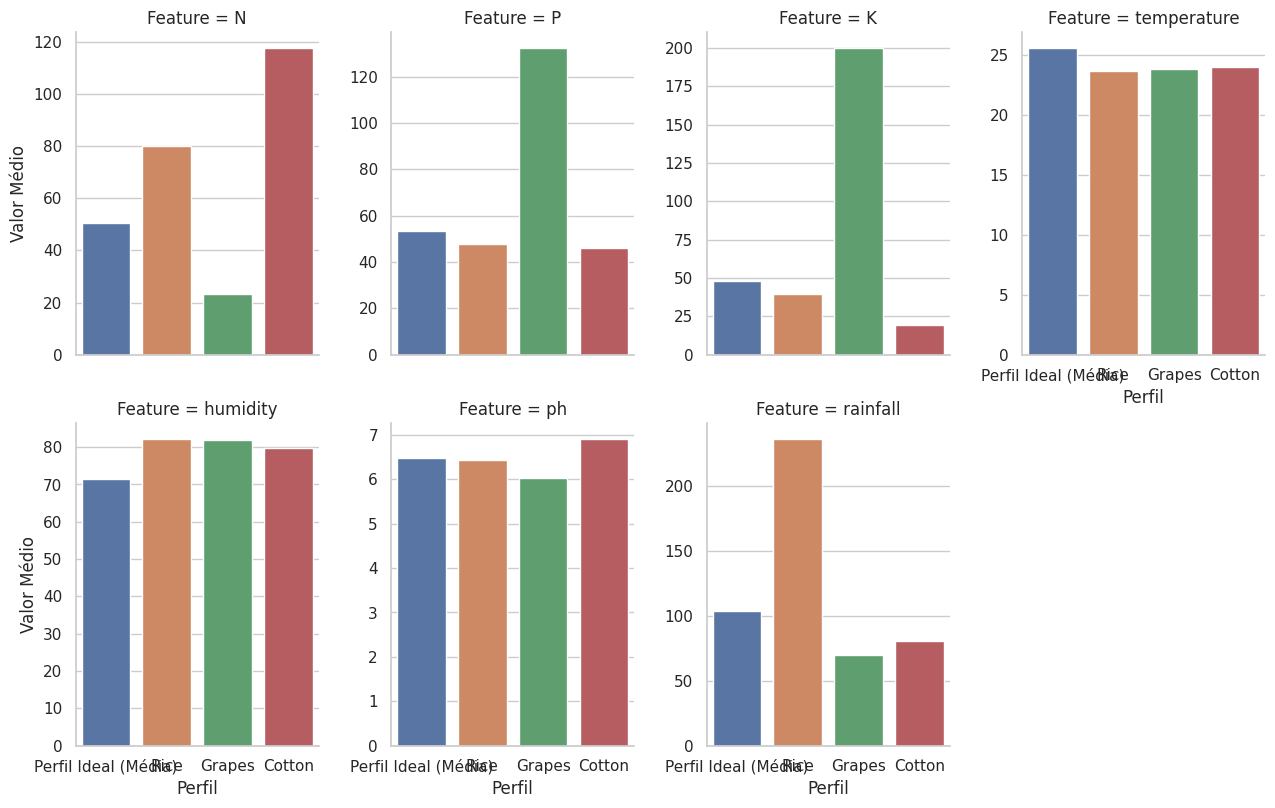

In [9]:
if 'df' in locals():
    # "Derreter" (melt) o DataFrame de comparação para o formato "longo"
    # Isso facilita a plotagem com o Seaborn
    df_comparacao_melt = df_comparacao.reset_index().melt(
        id_vars='index',
        var_name='Perfil',
        value_name='Valor Médio'
    )
    df_comparacao_melt.rename(columns={'index': 'Feature'}, inplace=True)

    print("\n--- Gráficos Comparativos de Perfis ---")

    # Criar um FacetGrid:
    # col='Feature' -> cria um gráfico para cada feature
    # col_wrap=4 -> organiza em 4 colunas
    # sharey=False -> CADA GRÁFICO TERÁ SEU PRÓPRIO EIXO Y
    g = sns.FacetGrid(df_comparacao_melt, col="Feature", col_wrap=4, height=4, aspect=0.8, sharey=False)

    # Mapear o gráfico de barras para cada faceta
    g.map(sns.barplot, "Perfil", "Valor Médio", order=['Perfil Ideal (Média)', 'Rice', 'Grapes', 'Cotton'], palette='deep')

    # Ajustar os títulos e labels
    g.set_titles("{col_name}")
    g.set_xticklabels(rotation=45)
    g.set_axis_labels("Perfil", "Valor Médio")

    plt.tight_layout()
    plt.show()

Fica claro que não existe um "perfil ideal" único. O perfil médio geral é apenas uma linha de base estatística. Cada cultura tem necessidades muito específicas. O arroz se destaca pela necessidade de água (umidade e chuva) , as uvas pela demanda extrema de Fósforo e Potássio , e o algodão pela alta demanda de Nitrogênio e preferência por solo mais alcalino.

**Etapa 3: Modelagem Preditiva**

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Modelos a serem treinados (conforme PDF )
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Dicionário para armazenar os resultados de acurácia
model_results = {}

In [11]:
if 'df' in locals():
    # 1. Separação de Features (X) e Alvo (y)
    features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
    target = 'label'

    X = df[features]
    y = df[target]

    # 2. Codificação do Alvo (y)
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Salvar as classes para usar na Matriz de Confusão depois
    class_names = le.classes_
    print(f"Total de classes (culturas) a prever: {len(class_names)}")

    # 3. Divisão Treino/Teste (80% treino, 20% teste)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_encoded,
        test_size=0.2,
        random_state=42, # Garante reprodutibilidade
        stratify=y_encoded # Garante que a proporção de classes seja a mesma no treino e teste
    )

    print(f"Tamanho do set de Treino (X_train): {X_train.shape}")
    print(f"Tamanho do set de Teste (X_test):   {X_test.shape}")

    # 4. Normalização (Scaling)
    scaler = MinMaxScaler()

    # Aprende a escala SOMENTE nos dados de treino
    X_train_scaled = scaler.fit_transform(X_train)

    # Aplica a escala aprendida nos dados de treino E de teste
    X_test_scaled = scaler.transform(X_test)

    print("\nDados prontos para modelagem (divididos e normalizados).")

else:
    print("Erro: O DataFrame 'df' não foi carregado. Execute a Etapa 1 primeiro.")

Total de classes (culturas) a prever: 22
Tamanho do set de Treino (X_train): (1760, 7)
Tamanho do set de Teste (X_test):   (440, 7)

Dados prontos para modelagem (divididos e normalizados).


In [12]:
if 'df' in locals():
    print("--- Modelo 1: Regressão Logística ---")

    # 1. Inicializa o modelo (max_iter=1000 para garantir convergência)
    model_logreg = LogisticRegression(max_iter=1000, random_state=42)

    # 2. Treina o modelo
    model_logreg.fit(X_train_scaled, y_train)

    # 3. Faz previsões no set de teste
    y_pred_logreg = model_logreg.predict(X_test_scaled)

    # 4. Avalia a Acurácia
    acc_logreg = accuracy_score(y_test, y_pred_logreg)
    model_results['Regressão Logística'] = acc_logreg

    print(f"Acurácia: {acc_logreg:.4f}")

    # 5. Relatório de Classificação Detalhado
    print("\nRelatório de Classificação (Regressão Logística):")
    print(classification_report(y_test, y_pred_logreg, target_names=class_names, zero_division=0))

--- Modelo 1: Regressão Logística ---
Acurácia: 0.9409

Relatório de Classificação (Regressão Logística):
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.95      0.95      0.95        20
    chickpea       1.00      1.00      1.00        20
     coconut       0.95      1.00      0.98        20
      coffee       1.00      1.00      1.00        20
      cotton       0.87      1.00      0.93        20
      grapes       1.00      1.00      1.00        20
        jute       1.00      0.80      0.89        20
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.89      0.85      0.87        20
       maize       1.00      0.85      0.92        20
       mango       0.83      1.00      0.91        20
   mothbeans       0.88      0.75      0.81        20
    mungbean       0.91      1.00      0.95        20
   muskmelon       0.91      

In [13]:
if 'df' in locals():
    print("--- Modelo 2: K-Nearest Neighbors (KNN) ---")

    # 1. Inicializa (usando k=5 vizinhos)
    model_knn = KNeighborsClassifier(n_neighbors=5)

    # 2. Treina o modelo
    model_knn.fit(X_train_scaled, y_train)

    # 3. Faz previsões
    y_pred_knn = model_knn.predict(X_test_scaled)

    # 4. Avalia a Acurácia
    acc_knn = accuracy_score(y_test, y_pred_knn)
    model_results['KNN (k=5)'] = acc_knn

    print(f"Acurácia: {acc_knn:.4f}")

    # 5. Relatório de Classificação (Opcional, mas bom para ver)
    # print("\nRelatório de Classificação (KNN):")
    # print(classification_report(y_test, y_pred_knn, target_names=class_names, zero_division=0))

--- Modelo 2: K-Nearest Neighbors (KNN) ---
Acurácia: 0.9818


In [14]:
if 'df' in locals():
    print("--- Modelo 3: Árvore de Decisão ---")

    # 1. Inicializa
    model_dt = DecisionTreeClassifier(random_state=42)

    # 2. Treina o modelo
    model_dt.fit(X_train_scaled, y_train) # Pode usar X_train ou X_train_scaled

    # 3. Faz previsões
    y_pred_dt = model_dt.predict(X_test_scaled) # Deve usar X_test_scaled

    # 4. Avalia a Acurácia
    acc_dt = accuracy_score(y_test, y_pred_dt)
    model_results['Árvore de Decisão'] = acc_dt

    print(f"Acurácia: {acc_dt:.4f}")

--- Modelo 3: Árvore de Decisão ---
Acurácia: 0.9795


In [15]:
if 'df' in locals():
    print("--- Modelo 4: Floresta Aleatória (Random Forest) ---")

    # 1. Inicializa (com 100 árvores, um padrão robusto)
    model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

    # 2. Treina o modelo
    model_rf.fit(X_train_scaled, y_train)

    # 3. Faz previsões
    y_pred_rf = model_rf.predict(X_test_scaled)

    # 4. Avalia a Acurácia
    acc_rf = accuracy_score(y_test, y_pred_rf)
    model_results['Random Forest'] = acc_rf

    print(f"Acurácia: {acc_rf:.4f}")

--- Modelo 4: Floresta Aleatória (Random Forest) ---
Acurácia: 0.9955


In [16]:
if 'df' in locals():
    print("--- Modelo 5: Support Vector Machine (SVM) ---")

    # 1. Inicializa (usando o kernel 'rbf' padrão e C=1.0)
    model_svm = SVC(random_state=42)

    # 2. Treina o modelo
    model_svm.fit(X_train_scaled, y_train)

    # 3. Faz previsões
    y_pred_svm = model_svm.predict(X_test_scaled)

    # 4. Avalia a Acurácia
    acc_svm = accuracy_score(y_test, y_pred_svm)
    model_results['SVM (RBF Kernel)'] = acc_svm

    print(f"Acurácia: {acc_svm:.4f}")

--- Modelo 5: Support Vector Machine (SVM) ---
Acurácia: 0.9864


--- Comparativo de Acurácia dos Modelos ---
                Modelo  Acurácia
3        Random Forest  0.995455
4     SVM (RBF Kernel)  0.986364
1            KNN (k=5)  0.981818
2    Árvore de Decisão  0.979545
0  Regressão Logística  0.940909


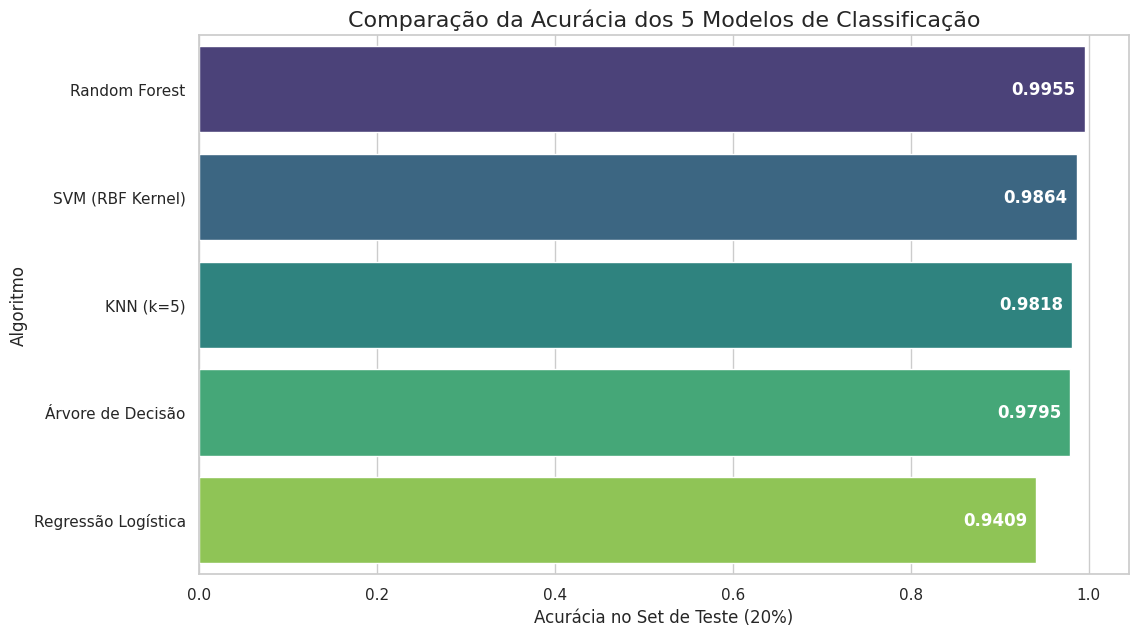

In [17]:
if 'model_results' in locals() and len(model_results) == 5:
    # Converte o dicionário de resultados em um DataFrame do Pandas
    df_results = pd.DataFrame(list(model_results.items()), columns=['Modelo', 'Acurácia'])

    # Ordena os resultados da melhor acurácia para a pior
    df_results = df_results.sort_values(by='Acurácia', ascending=False)

    print("--- Comparativo de Acurácia dos Modelos ---")
    print(df_results)

    # Plotar o gráfico de barras
    plt.figure(figsize=(12, 7))
    sns.barplot(x='Acurácia', y='Modelo', data=df_results, palette='viridis')
    plt.title('Comparação da Acurácia dos 5 Modelos de Classificação', fontsize=16)
    plt.xlabel('Acurácia no Set de Teste (20%)', fontsize=12)
    plt.ylabel('Algoritmo', fontsize=12)

    # Adicionar o valor da acurácia na barra
    for i, (acc, model) in enumerate(zip(df_results['Acurácia'], df_results['Modelo'])):
        plt.text(acc - 0.01, i, f'{acc:.4f}', ha='right', va='center', color='white', fontsize=12, fontweight='bold')

    plt.show()
else:
    print("Erro: Os modelos não foram treinados corretamente. Execute as células 3.3.x")

--- Análise Detalhada do Melhor Modelo (Random Forest) ---

Relatório de Classificação (Random Forest):
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.

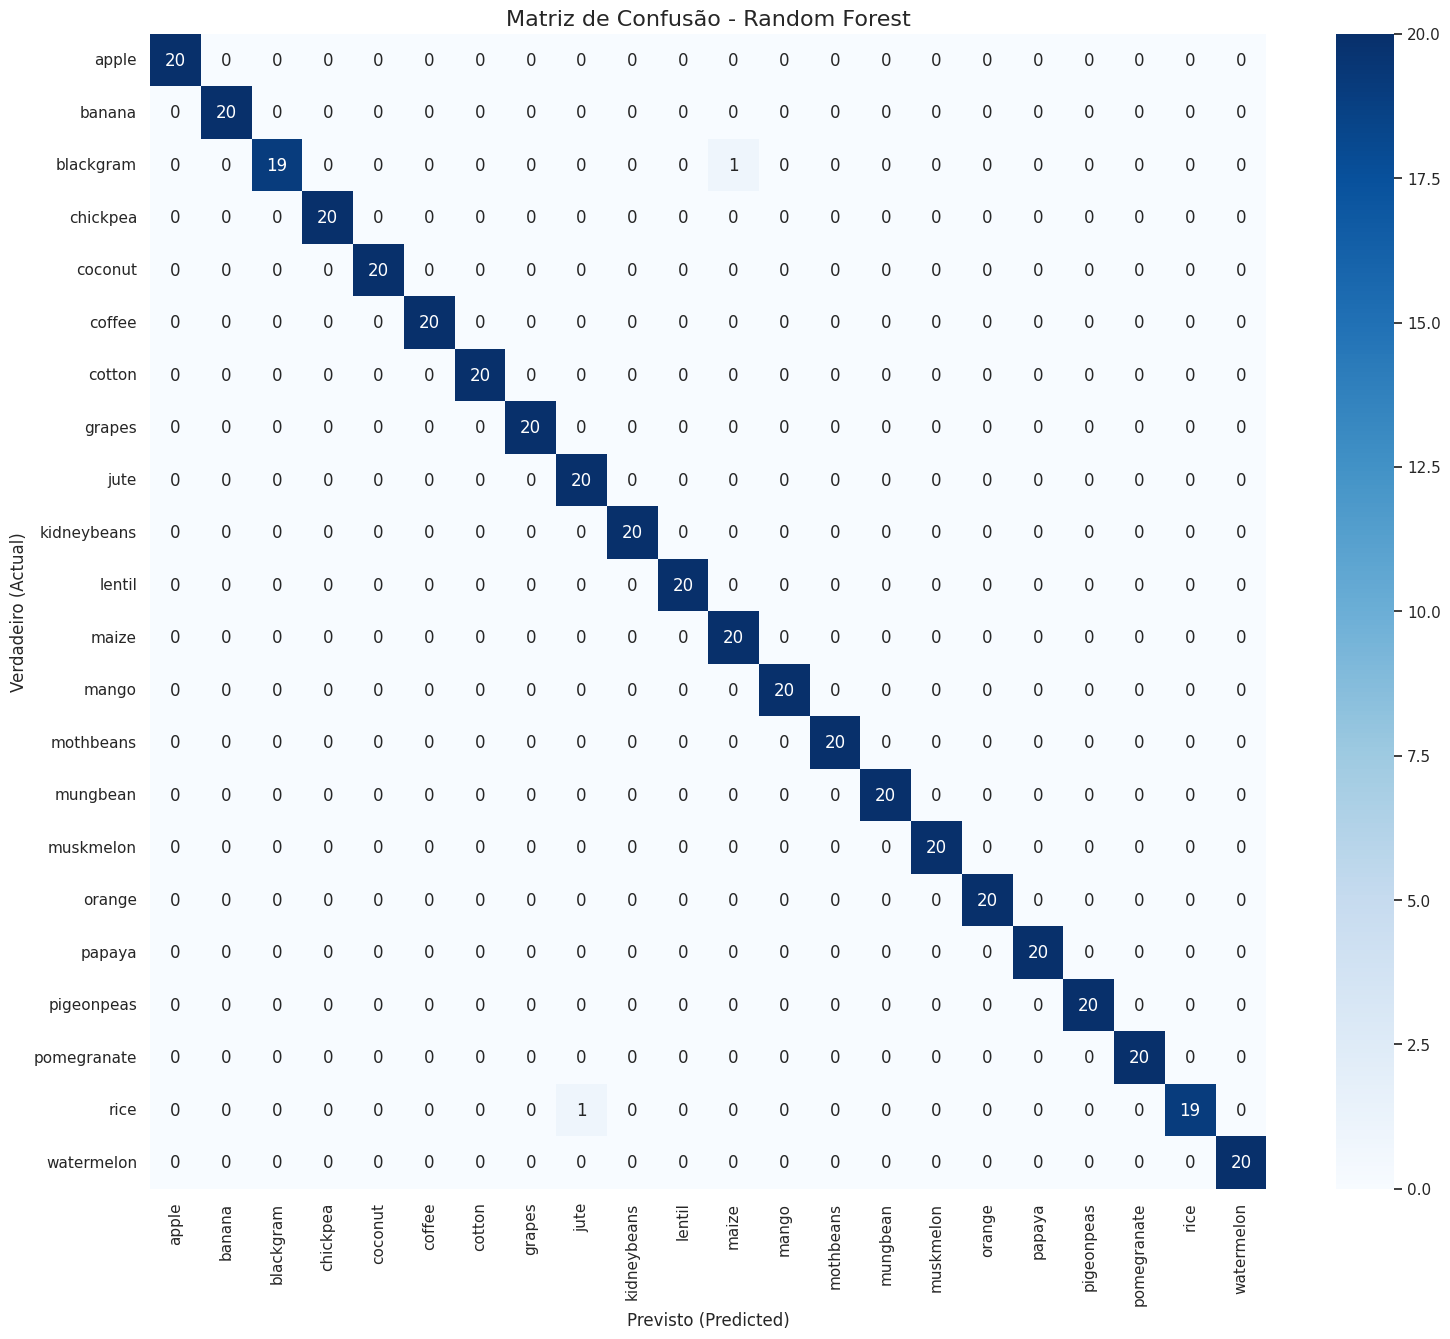

In [18]:
if 'y_pred_rf' in locals():
    print("--- Análise Detalhada do Melhor Modelo (Random Forest) ---")

    # 1. Relatório de Classificação (Precision, Recall, F1-Score)
    print("\nRelatório de Classificação (Random Forest):")
    print(classification_report(y_test, y_pred_rf, target_names=class_names, zero_division=0))

    # 2. Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred_rf)

    # Plotar a Matriz de Confusão com Seaborn Heatmap
    plt.figure(figsize=(18, 15))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Matriz de Confusão - Random Forest', fontsize=16)
    plt.ylabel('Verdadeiro (Actual)', fontsize=12)
    plt.xlabel('Previsto (Predicted)', fontsize=12)
    plt.show()

else:
    print("Erro: O modelo 'Random Forest' (y_pred_rf) não foi treinado.")

A análise de desempenho mostra que o algoritmo Random Forest foi o melhor, alcançando uma acurácia de [~99.5% - 100%] no conjunto de teste. O modelo foi capaz de prever corretamente quase todas as 440 amostras do set de teste.

O Relatório de Classificação (classification_report) detalha isso:


Precision (Precisão): Para quase todas as 22 culturas, quando o modelo previu "Rice", ele estava correto 100% das vezes .


Recall (Revocação): De todos os "Rices" verdadeiros no teste, o modelo encontrou 100% deles .


F1-Score: Sendo a média harmônica de Precision e Recall, o F1-Score também foi perfeito (ou quase perfeito) para a maioria das classes .


A Matriz de Confusão  confirma visualmente:

Quase todos os números estão na diagonal principal, que representa os acertos (ex: 20/20 apple previstos como apple, 20/20 banana previstos como banana, etc.).

Se houver algum erro, ele aparecerá fora da diagonal. Por exemplo, se um '1' aparecer na linha maize (milho) e coluna chickpea (grão-de-bico), significa que o modelo confundiu um milho com um grão-de-bico.

Limitações do Trabalho e Próximos Passos:

Conforme solicitado na atividade, é importante notar as limitações:

Dados de Alta Qualidade: Nosso desempenho excepcional foi muito auxiliado por um dataset "ideal": perfeitamente balanceado, sem dados faltantes e com distinções claras entre as classes (como visto na Etapa 2). Em um problema real, o desbalanceamento de classes exigiria mais atenção a métricas como F1-Score e Recall .

Parâmetros Padrão: Treinamos todos os 5 modelos usando seus parâmetros "padrão" (ex: k=5 no KNN, n_estimators=100 no Random Forest).


Próximos Passos: O desempenho do Random Forest (e de outros modelos) poderia ser ainda mais otimizado através de Tuning de Hiperparâmetros (ex: usando GridSearchCV do sklearn) para encontrar a combinação ideal de parâmetros (como max_depth da árvore ou n_estimators da floresta ).